In [171]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

In [240]:
def sol_x(A_, b_, c_, v0_, v1_, r0_, r1_, t, w2, b_mat):
    x = b_[0] * v0_ * np.exp(r0_*t) + b_[1] * v1_ * np.exp(r1_*t) + c_
    return x[0], -b_mat * x[1] / w2

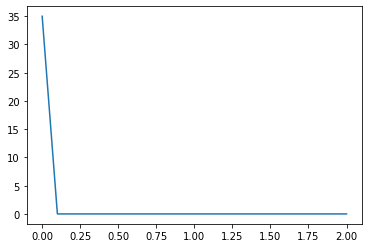

In [242]:
T = 2.
dt = 0.1
x0 = 35.
xT = 7. * 1e-4
t_array = np.arange(0,T+dt, dt)

x_nonlin = np.zeros(( int(T/dt)+1 ))
x_nonlin[0] = x0
u = np.zeros(( int(T/dt) + 1 ))
#u[10:15] = -3.

a = -10.
b = 22.5

for t in range(1, int(T/dt)+1):
    x_dot = a * x_nonlin[t-1] + b * u[t-1]
    x_nonlin[t] = x_dot * dt + x_nonlin[t-1]
    
plt.plot(t_array, x_nonlin)
plt.show()

[34.9998586   0.08256901]
[ 1.32914447e-13 -5.56450277e-15]
[ 1.41396509e-04 -2.79301746e-06]
0 35.0 -1.8577399007019868
1 11.426391656264396 -0.6064458668151108
2 3.730419180704632 -0.19794139421907808
3 1.2179488163505794 -0.0645787315561551
4 0.39771364116567526 -0.021040408262071486
5 0.12993506271658373 -0.006826642881037479
6 0.042514565282248076 -0.0021863372045173653
7 0.013974779286233037 -0.0006714367812347475
8 0.0046575212038516105 -0.00017687330351007132
9 0.0016157587402734416 -1.541354657594867e-05
10 0.0006227337118201573 3.7302990141759296e-05
11 0.0002985630027421629 5.452990736131571e-05
12 0.00019278698185168494 6.020530485519768e-05
13 0.0001584218963773673 6.22155751639571e-05
14 0.0001477148701493487 6.335414038438689e-05
15 0.00014578768329542396 6.520312269753401e-05
16 0.00014996236444082592 7.03318223749187e-05
17 0.000166039947659339 8.586695413952876e-05
18 0.00021636144651014845 0.00013339575437383463
19 0.0003708523760949219 0.00027896307298187783
20 0.00

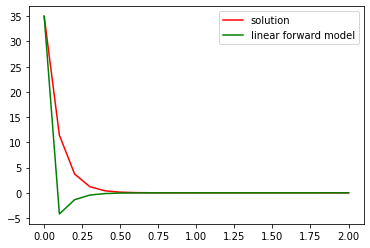

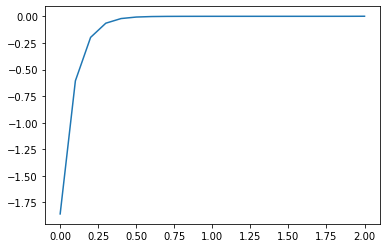

In [247]:
wp = 1./20.
w2 = 1.

A_ =  np.array( [[a, -b**2 / w2], [-wp, -a]] )
Ainv = np.linalg.inv(A_)

c = - np.matmul(Ainv, wp * np.array( [0., xT] ) )

r,v = np.linalg.eig(A_)
v0 = v[:,0]
r0 = r[0]
v1 = v[:,1]
r1 = r[1]

A_tilde = np.array( [ [ v0[0], v1[0] ], [ v0[0]*np.exp(r0*T), v1[0]*np.exp(r1*T) ] ] )
B_tilde = np.array( [x0 - c[0] , xT - c[1] ] )


b_ = np.linalg.solve(A_tilde, B_tilde)

print(b_[0]*v0)
print(b_[1]*v1)
print(c)

x_ = np.zeros(( t_array.shape ))
u_ = x_.copy()
for i in range(len(t_array)):
    t = t_array[i]
    x_[i], u_[i] = sol_x(A_, b_, c, v0, v1, r0, r1, t, w2, b)
    
    print(i, x_[i], u_[i])

x_nonlin = np.zeros(( int(T/dt)+1 ))
x_nonlin[0] = x0
u = u_.copy()

for t in range(1, int(T/dt)+1):
    x_dot = a * x_nonlin[t-1] + b * u[t-1]
    x_nonlin[t] = x_dot * dt + x_nonlin[t-1]

plt.plot(t_array, x_, color='red', label='solution')
plt.plot(t_array, x_nonlin, color='green', label='linear forward model')
plt.legend()
plt.show()

plt.plot(t_array, u_)
plt.show()